In [28]:
from sklearn import svm
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
import numpy as np

start = time.process_time()
trainset = 'traindata.xlsx'
train = pd.read_excel(trainset, header = 0)
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
model = svm.SVC(kernel='rbf', gamma=0.05,  probability=True)
model.fit(X_train, y_train)
end = time.process_time()
print("Training time: ", end-start)
y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print(cm)


Training time:  8.015625
[[  143  1458]
 [   12 10591]]


In [29]:
TPR = np.sum(cm[1:,1:])/np.sum(cm[1:,:])
FPR = np.sum(cm[1:,0])/np.sum(cm[0,:])
Precision = np.sum(cm[1:,1:])/np.sum(cm[:,1:])
TNR = cm[0,0]/np.sum(cm[0,:])
FNR = np.sum(cm[1:,0]/np.sum(cm[1:,:]))
F1 = 2*Precision*TPR/(Precision+TPR)
Acc = np.sum(np.diag(cm))/np.sum(cm)

In [30]:
start = time.process_time()
testset = 'testdata.xlsx'
test = pd.read_excel(testset, header = 0)
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]
y_pred = model.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
end = time.process_time()
print("Detect time: ", end-start)
print(cm2)


Detect time:  0.546875
[[   0  400]
 [   0 2661]]


In [31]:
TPR2 = np.sum(cm2[1:,1:])/np.sum(cm2[1:,:])
FPR2 = np.sum(cm2[1:,0])/np.sum(cm2[0,:])
Precision2 = np.sum(cm2[1:,1:])/np.sum(cm2[:,1:])
TNR2 = cm2[0,0]/np.sum(cm2[0,:])
FNR2 = np.sum(cm2[1:,0]/np.sum(cm2[1:,:]))
F12 = 2*Precision*TPR/(Precision+TPR)
Acc2 = np.sum(np.diag(cm2))/np.sum(cm2)

In [32]:
print("Acc = ",Acc2)
print("Precision = ",Precision2)
print("F1 = ", F12)

Acc =  0.8693237504083633
Precision =  0.8693237504083633
F1 =  0.9351050679851668


# SHAP

In [17]:
import shap

shap.initjs()
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test[0:100])

Exact explainer: 101it [01:05,  1.35it/s]                                                                              


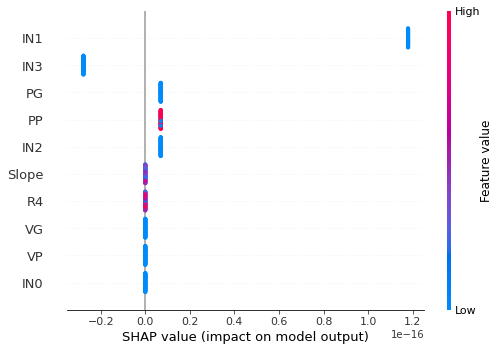

In [18]:
shap.plots.beeswarm(shap_values)

In [19]:
ind = 88
shap.plots.force(shap_values[ind])

In [20]:
ind = 0
shap.plots.force(shap_values[ind])

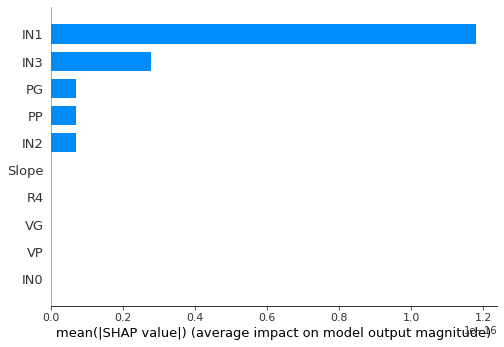

In [21]:
shap.summary_plot(shap_values, X_train.values, plot_type="bar", feature_names = X_train.columns)

In [22]:
shap.plots.waterfall(shap_values[88])

ValueError: Image size of 256353376x427 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x468 with 3 Axes>

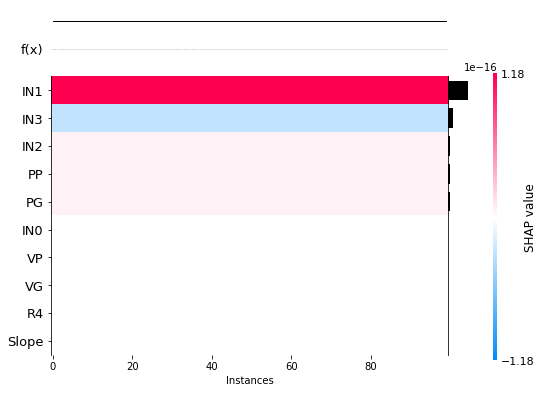

In [23]:
shap.plots.heatmap(shap_values)

In [33]:
import shap
shap.initjs()

explainer = shap.KernelExplainer(model.predict_proba, X_train[0:1000])
shap_values = explainer.shap_values(X_test[0:100])


Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [34]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[0:100])

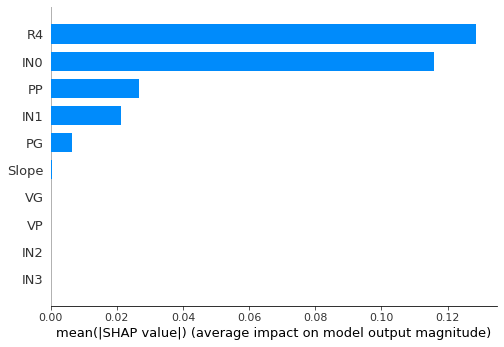

In [35]:
shap.summary_plot(shap_values[0], X_train.values, plot_type="bar", feature_names = X_train.columns)

In [40]:
i=0
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.values[i], feature_names = X_test.columns)

In [41]:
i=99
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.values[i], feature_names = X_test.columns)

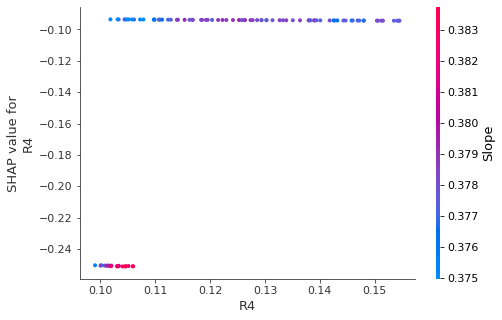

In [39]:
shap.dependence_plot(8, shap_values[0], X_test[0:100].values, feature_names=X_train.columns)